### Mario Enrique Pisquiy Gómez
#### Carné 20200399

In [4]:
def imgnorm(img):
    """Nomalize an image
    Args:
        img (numpy array): Source image
    Returns:
        normalized (numpy array): Nomalized image
    """
    vmin, vmax = img.min(), img.max()
    normalized_values = []
    delta = vmax-vmin

    for p in img.ravel():
        normalized_values.append(255*(p-vmin)/delta)

    normalized  = np.array(normalized_values).astype(np.uint8).reshape(img.shape[0],-1)
    return normalized

In [5]:
def binarizacion(image):
    imgray = cv.cvtColor(image, cv.COLOR_BGR2GRAY)
    normalized = imgnorm(imgray)
    binarized = cv.adaptiveThreshold(normalized, 255, cv.ADAPTIVE_THRESH_GAUSSIAN_C, cv.THRESH_BINARY,127,0)
    return binarized

In [6]:
def encontrarContornos(image):
    mode = cv.RETR_TREE 
    method = [cv.CHAIN_APPROX_NONE, cv.CHAIN_APPROX_SIMPLE]
    contours, hierarchy = cv.findContours(image, mode, method[0])
    return contours

In [7]:
def encontrarPlaca(image):
    contours = encontrarContornos(image)
    contorno = []
    caracteristicas = []
    extent = 0

    for c in contours:
        percent =0.052
        epsilon = percent*cv.arcLength(c,True)
        approx = cv.approxPolyDP(c,epsilon,True)
        x,y,w,h = cv.boundingRect(c)
        area = cv.contourArea(approx)
        if (w>h and area > 4000):
            rect_area = w*h
            extent1 = float(area)/rect_area
            if extent1 > extent:
                extent = extent1
                contorno = c
                caracteristicas = [x,y,w,h]
                
    placa = im[caracteristicas[1]:caracteristicas[1]+caracteristicas[3],caracteristicas[0]:caracteristicas[0]+caracteristicas[2]]
    return placa

In [8]:
def encontrarNumeros(image):
    contours = encontrarContornos(image)
    contorno = []
    extent = 0
    direcciones_y = {}
    tamaño_placa = placa.shape
    area_min = tamaño_placa[0] * tamaño_placa[1] * 0.011

    for c in contours:
        percent =0.052
        epsilon = percent*cv.arcLength(c,True)
        approx = cv.approxPolyDP(c,epsilon,True)
        x,y,w,h = cv.boundingRect(c)
        area = cv.contourArea(approx)
        if (w<h and area > area_min):
            contorno.append(c)
            if (y in direcciones_y):
                direcciones_y[y].append([x,y,w,h,len(contorno)-1])
            elif ((y-1) in direcciones_y):
                direcciones_y[y-1].append([x,y,w,h,len(contorno)-1])
            elif ((y-2) in direcciones_y):
                direcciones_y[y-2].append([x,y,w,h,len(contorno)-1])
            elif ((y-3) in direcciones_y):
                direcciones_y[y-3].append([x,y,w,h,len(contorno)-1])
            elif ((y+1) in direcciones_y):
                direcciones_y[y+1].append([x,y,w,h,len(contorno)-1])
            elif ((y+2) in direcciones_y):
                direcciones_y[y+2].append([x,y,w,h,len(contorno)-1])
            elif ((y+3) in direcciones_y):
                direcciones_y[y+3].append([x,y,w,h,len(contorno)-1])
            else:
                direcciones_y[y] = [[x,y,w,h,len(contorno)-1]]

    keys = []
    eliminados = 0
    for key in direcciones_y:
        if len(direcciones_y[key]) < 2:
            for element in direcciones_y[key]:
                contorno.pop(int(element[4]-eliminados))
                keys.append(key)
                eliminados = eliminados + 1
    for key in keys:
        direcciones_y.pop(key)

    return contorno

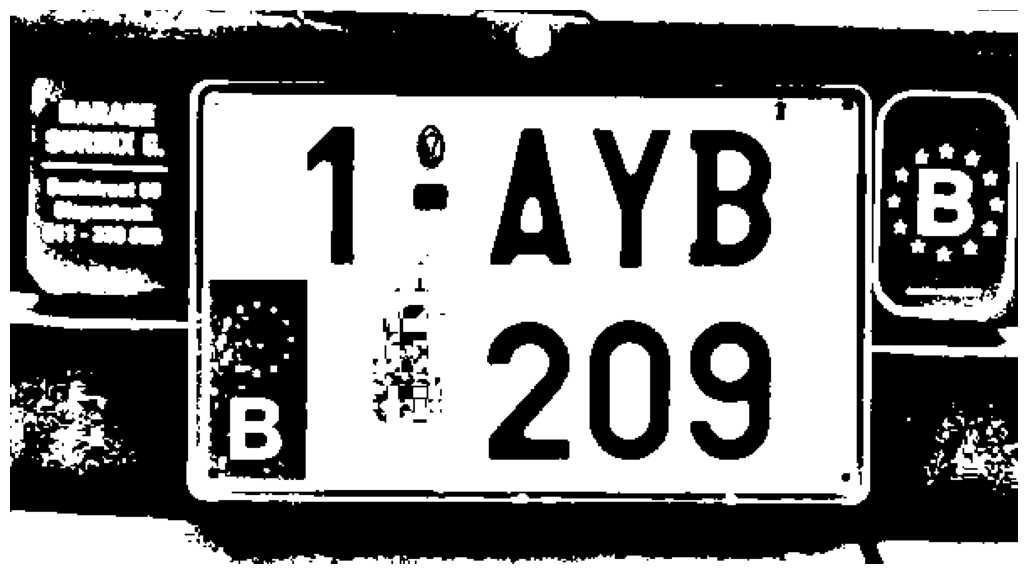

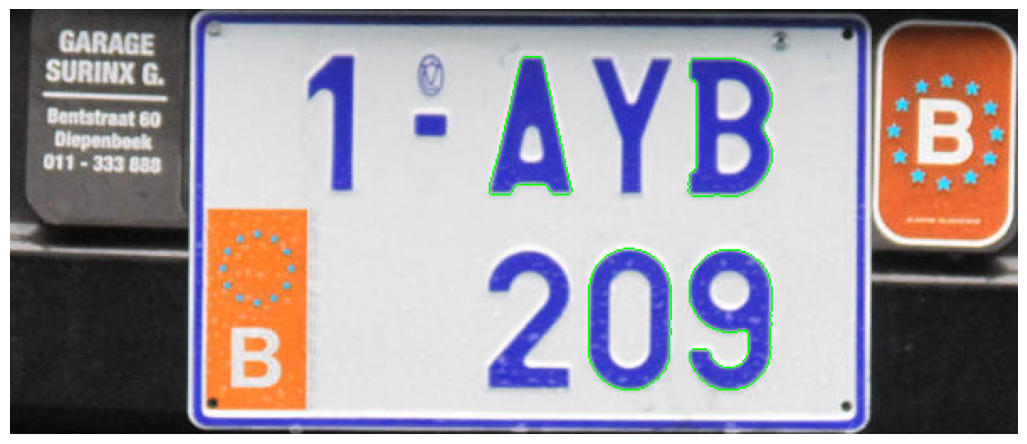

In [10]:
binarized = binarizacion(im)
cvlib.imgview(binarized)
placa = encontrarPlaca(binarized)
numeros = encontrarNumeros(binarizacion(placa))
cvlib.imgview(cv.drawContours(placa.copy(), numeros, -1, color, 1))

In [2]:
from collections import OrderedDict
import matplotlib.pyplot as plt
import numpy as np
import cv2 as cv
import pickle
import errno
import cvlib
import io


%matplotlib inline
#plt.style.use('dark_background') 
PATH = 'C:/GitHub/pythonPrograms/computerVision2023/proyectos/LicencePlates/'

In [57]:
filename=PATH+'images18.jpg'

(330, 600, 3)


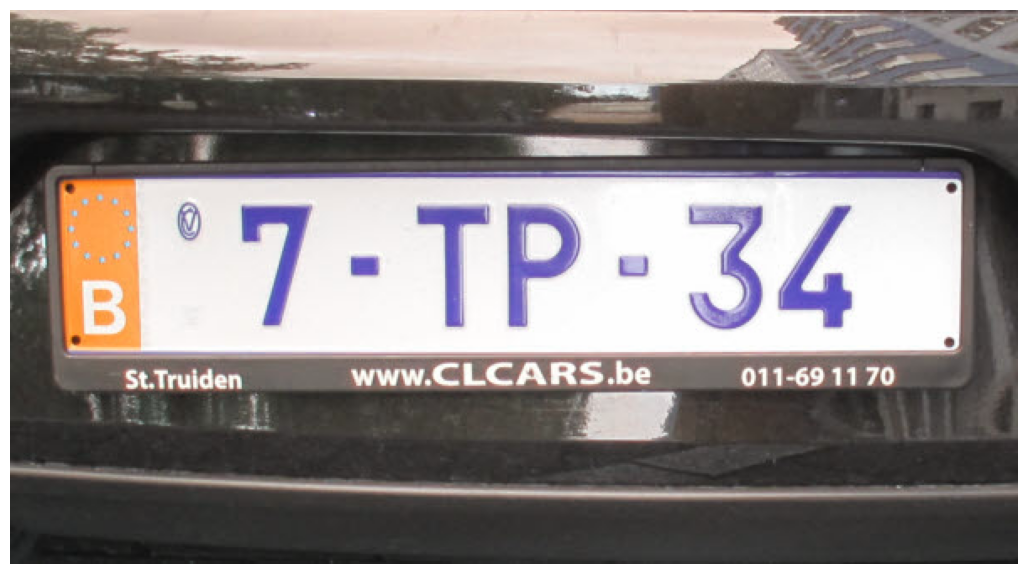

In [58]:
color = (0,255,0)
im = cv.imread(filename,cv.IMREAD_COLOR)
print(im.shape)
cvlib.imgview(im)

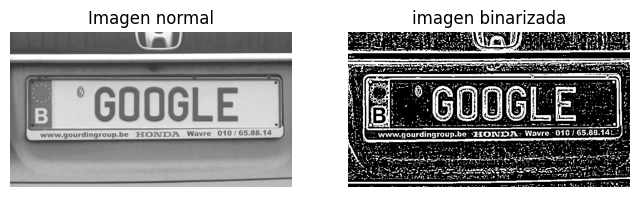

In [37]:
imgray = cv.cvtColor(im, cv.COLOR_BGR2GRAY)
normalized = imgnorm(imgray)
binarized = cv.adaptiveThreshold(normalized, 255, cv.ADAPTIVE_THRESH_GAUSSIAN_C, cv.THRESH_BINARY_INV,11,2)
cvlib.imgcmp(imgray,binarized, ['Imagen normal', 'imagen binarizada'])

In [38]:
mode = cv.RETR_TREE 
method = [cv.CHAIN_APPROX_NONE, cv.CHAIN_APPROX_SIMPLE]
contours, hierarchy = cv.findContours(binarized, mode, method[0])

In [39]:
contorno = []
caracteristicas = []
extent = 0

for c in contours:
    percent =0.052
    epsilon = percent*cv.arcLength(c,True)
    approx = cv.approxPolyDP(c,epsilon,True)
    x,y,w,h = cv.boundingRect(c)
    area = cv.contourArea(approx)
    if (w>h and area > 4000):
        rect_area = w*h
        extent1 = float(area)/rect_area
        if extent1 > extent:
            extent = extent1
            contorno = c
            caracteristicas = [x,y,w,h]

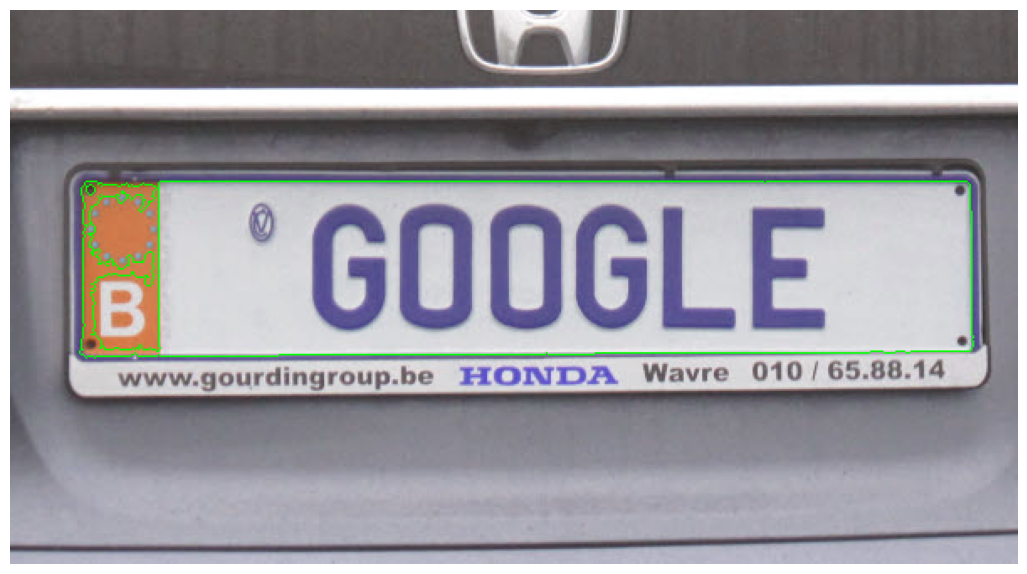

In [40]:
cvlib.imgview(cv.drawContours(im.copy(), contorno, -1, color, 1))

In [41]:
placa = im[caracteristicas[1]:caracteristicas[1]+caracteristicas[3],caracteristicas[0]:caracteristicas[0]+caracteristicas[2]]

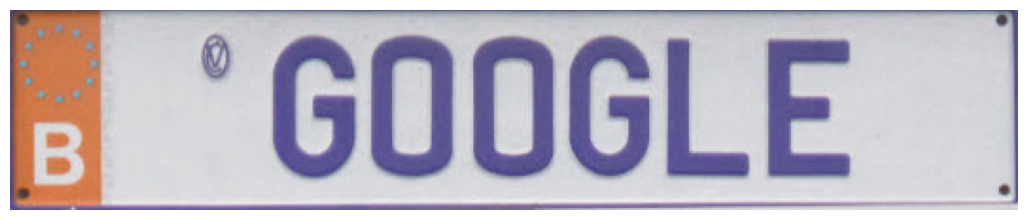

In [42]:
cvlib.imgview(placa)

In [43]:
placaBinarized = binarizacion(placa)

In [44]:
mode = cv.RETR_TREE # contour retrieval mode
method = [cv.CHAIN_APPROX_NONE, cv.CHAIN_APPROX_SIMPLE] # contour approximation method 
contours, hierarchy = cv.findContours(placaBinarized, mode, method[0])

In [55]:
len(contours)

50

In [56]:
hierarchy[0]

array([[ 1, -1, -1, -1],
       [ 2,  0, -1, -1],
       [ 3,  1, -1, -1],
       [ 4,  2, -1, -1],
       [ 5,  3, -1, -1],
       [ 6,  4, -1, -1],
       [ 7,  5, -1, -1],
       [ 8,  6, -1, -1],
       [ 9,  7, -1, -1],
       [10,  8, -1, -1],
       [11,  9, -1, -1],
       [14, 10, 12, -1],
       [13, -1, -1, 11],
       [-1, 12, -1, 11],
       [15, 11, -1, -1],
       [16, 14, -1, -1],
       [17, 15, -1, -1],
       [18, 16, -1, -1],
       [19, 17, -1, -1],
       [20, 18, -1, -1],
       [21, 19, -1, -1],
       [22, 20, -1, -1],
       [28, 21, 23, -1],
       [24, -1, -1, 22],
       [25, 23, -1, 22],
       [26, 24, -1, 22],
       [27, 25, -1, 22],
       [-1, 26, -1, 22],
       [49, 22, 29, -1],
       [30, -1, -1, 28],
       [31, 29, -1, 28],
       [32, 30, -1, 28],
       [33, 31, -1, 28],
       [34, 32, -1, 28],
       [35, 33, -1, 28],
       [36, 34, -1, 28],
       [37, 35, -1, 28],
       [39, 36, 38, 28],
       [-1, -1, -1, 37],
       [40, 37, -1, 28],


In [45]:
contours = encontrarContornos(placaBinarized)
contorno = []
extent = 0
direcciones_y = {}
tamaño_placa = placa.shape
area_min = tamaño_placa[0] * tamaño_placa[1] * 0.005

for c in contours:
    percent =0.052
    epsilon = percent*cv.arcLength(c,True)
    approx = cv.approxPolyDP(c,epsilon,True)
    x,y,w,h = cv.boundingRect(c)
    area = cv.contourArea(approx)
    if (w<h and area > area_min):
        contorno.append(c)
        if (y in direcciones_y):
            direcciones_y[y].append([x,y,w,h,len(contorno)-1])
        elif ((y-1) in direcciones_y):
            direcciones_y[y-1].append([x,y,w,h,len(contorno)-1])
        elif ((y-2) in direcciones_y):
            direcciones_y[y-2].append([x,y,w,h,len(contorno)-1])
        elif ((y-3) in direcciones_y):
            direcciones_y[y-3].append([x,y,w,h,len(contorno)-1])
        elif ((y+1) in direcciones_y):
            direcciones_y[y+1].append([x,y,w,h,len(contorno)-1])
        elif ((y+2) in direcciones_y):
            direcciones_y[y+2].append([x,y,w,h,len(contorno)-1])
        elif ((y+3) in direcciones_y):
            direcciones_y[y+3].append([x,y,w,h,len(contorno)-1])
        else:
            direcciones_y[y] = [[x,y,w,h,len(contorno)-1]]
print(direcciones_y)

keys = []
eliminados = 0
for key in direcciones_y:
    if len(direcciones_y[key]) < 2:
        for element in direcciones_y[key]:
            contorno.pop(int(element[4]-eliminados))
            keys.append(key)
            eliminados = eliminados + 1

if len(direcciones_y) > 1:
    for i in direcciones_y:
        if len(direcciones_y[i]) < 3:
            keys.append(i)
            
for key in keys:
    if (key in direcciones_y):
        direcciones_y.pop(key)

direcciones_y = OrderedDict(sorted(direcciones_y.items()))

for i in direcciones_y:
    direcciones_y[i] = sorted(direcciones_y[i], key=lambda x: x[0])

print(direcciones_y)

{59: [[12, 59, 27, 35, 0]], 4: [[3, 4, 34, 40, 1]], 15: [[399, 15, 47, 76, 2], [346, 15, 46, 76, 3], [244, 14, 45, 76, 4], [295, 13, 44, 78, 6], [190, 13, 45, 77, 7], [138, 13, 46, 78, 9]], 27: [[256, 27, 21, 50, 5], [202, 26, 21, 51, 8]]}
OrderedDict([(15, [[138, 13, 46, 78, 9], [190, 13, 45, 77, 7], [244, 14, 45, 76, 4], [295, 13, 44, 78, 6], [346, 15, 46, 76, 3], [399, 15, 47, 76, 2]]), (27, [[202, 26, 21, 51, 8], [256, 27, 21, 50, 5]])])


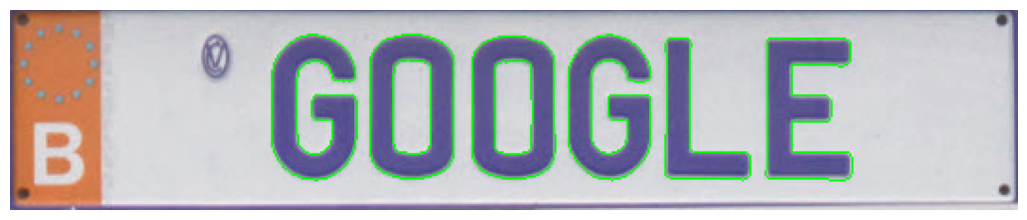

In [46]:
cvlib.imgview(cv.drawContours(placa.copy(), contorno, -1, color, 1))

In [47]:
direcciones_y

OrderedDict([(15,
              [[138, 13, 46, 78, 9],
               [190, 13, 45, 77, 7],
               [244, 14, 45, 76, 4],
               [295, 13, 44, 78, 6],
               [346, 15, 46, 76, 3],
               [399, 15, 47, 76, 2]]),
             (27, [[202, 26, 21, 51, 8], [256, 27, 21, 50, 5]])])

In [48]:
for keys, values in direcciones_y.items(): 
    for i in values:
        cv.rectangle(placa, (i[0], i[1]), (i[0]+i[2], i[1]+i[3]), color, 3)

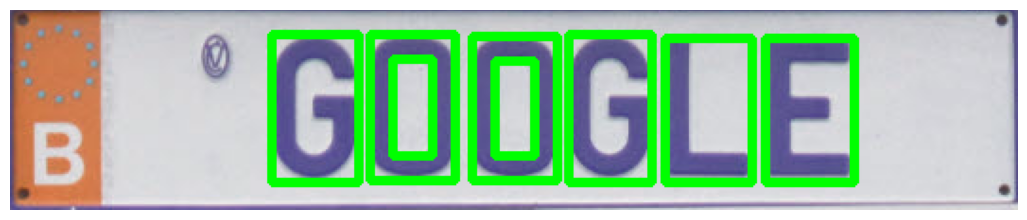

In [49]:
cvlib.imgview(placa)

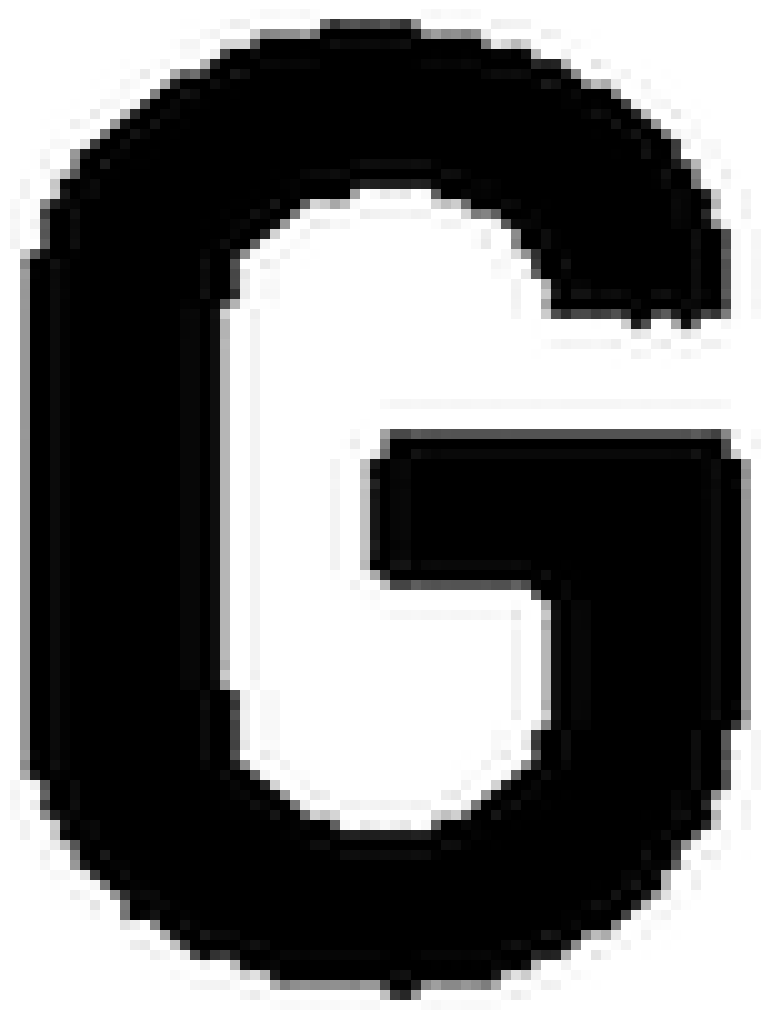

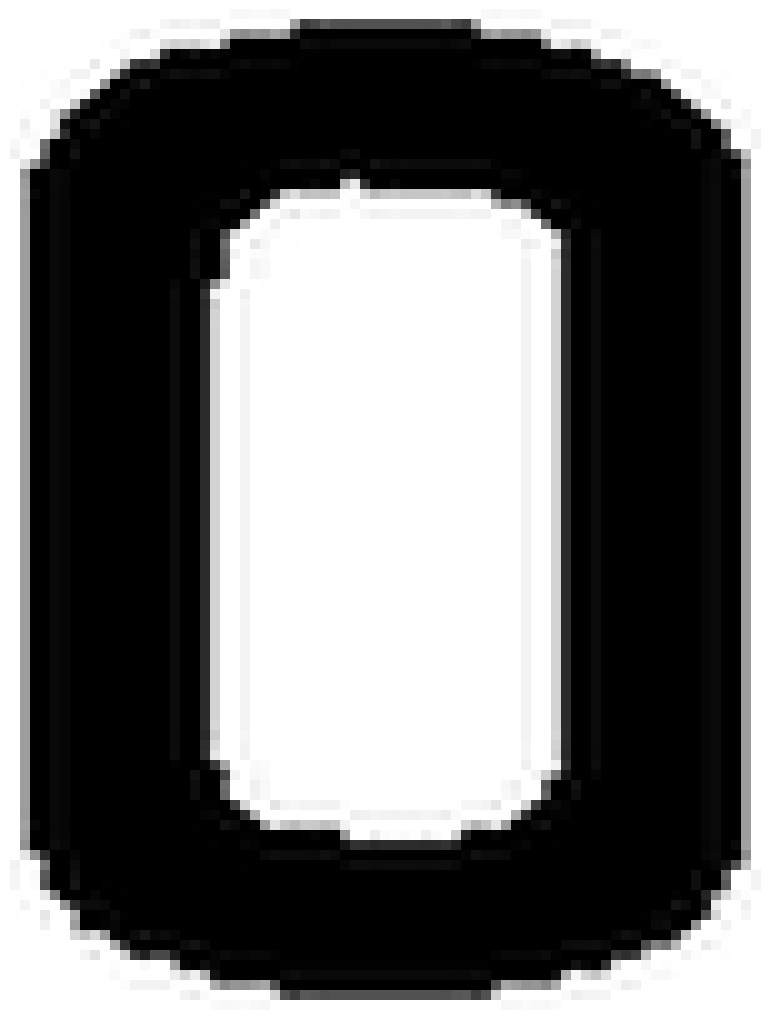

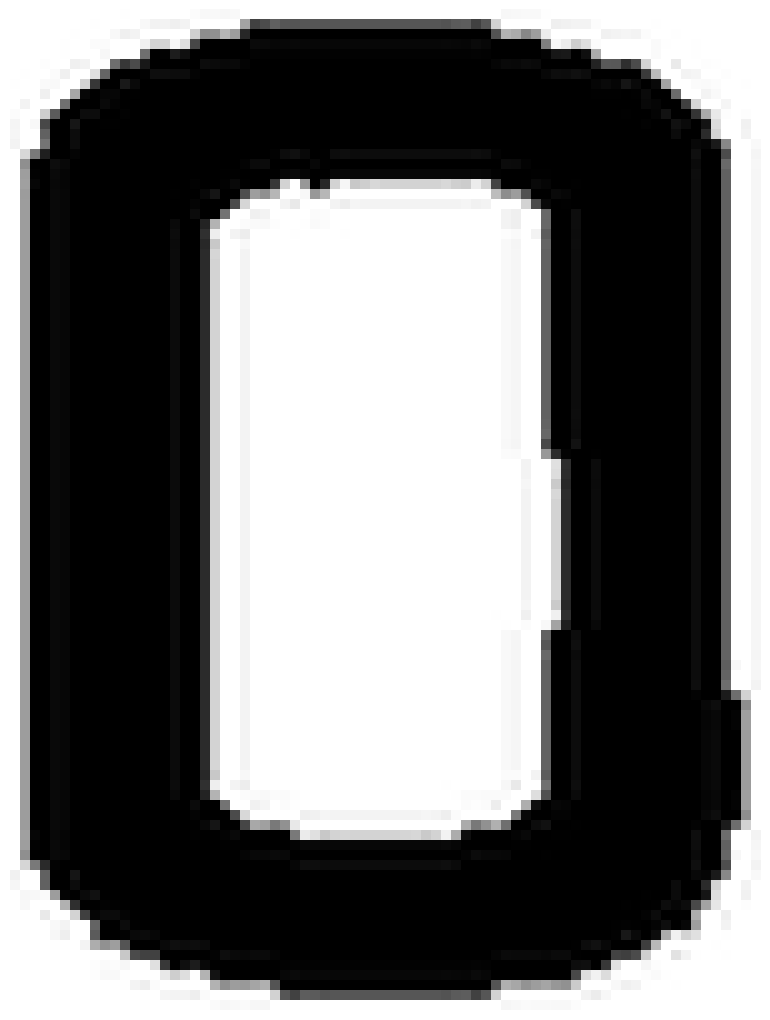

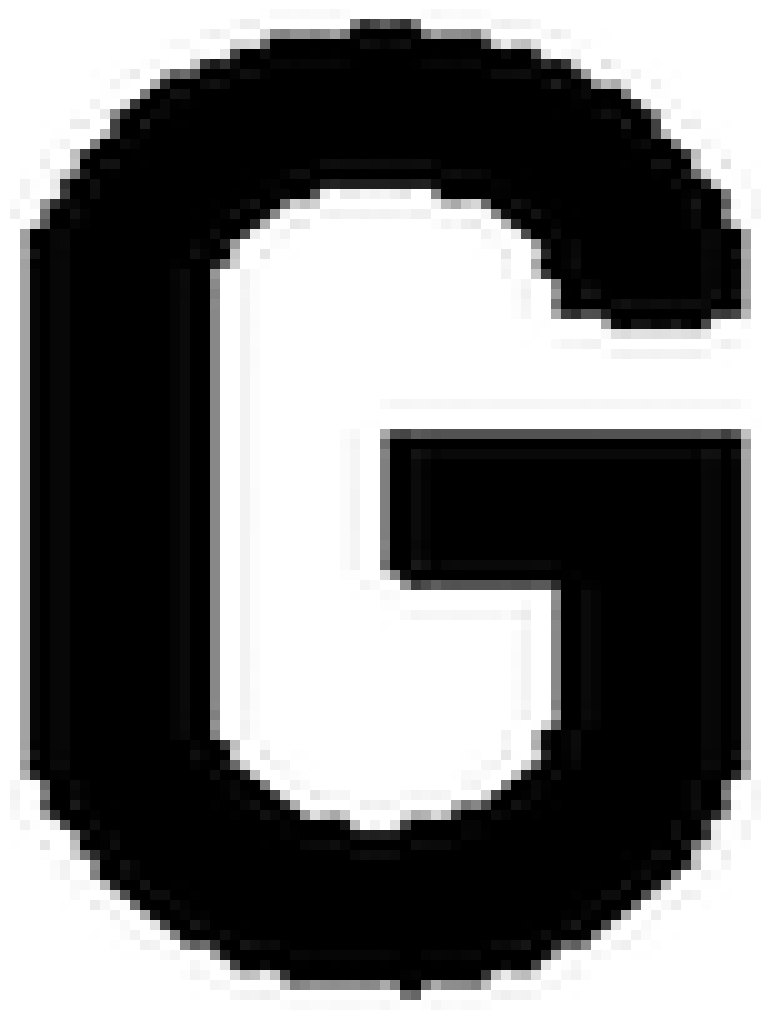

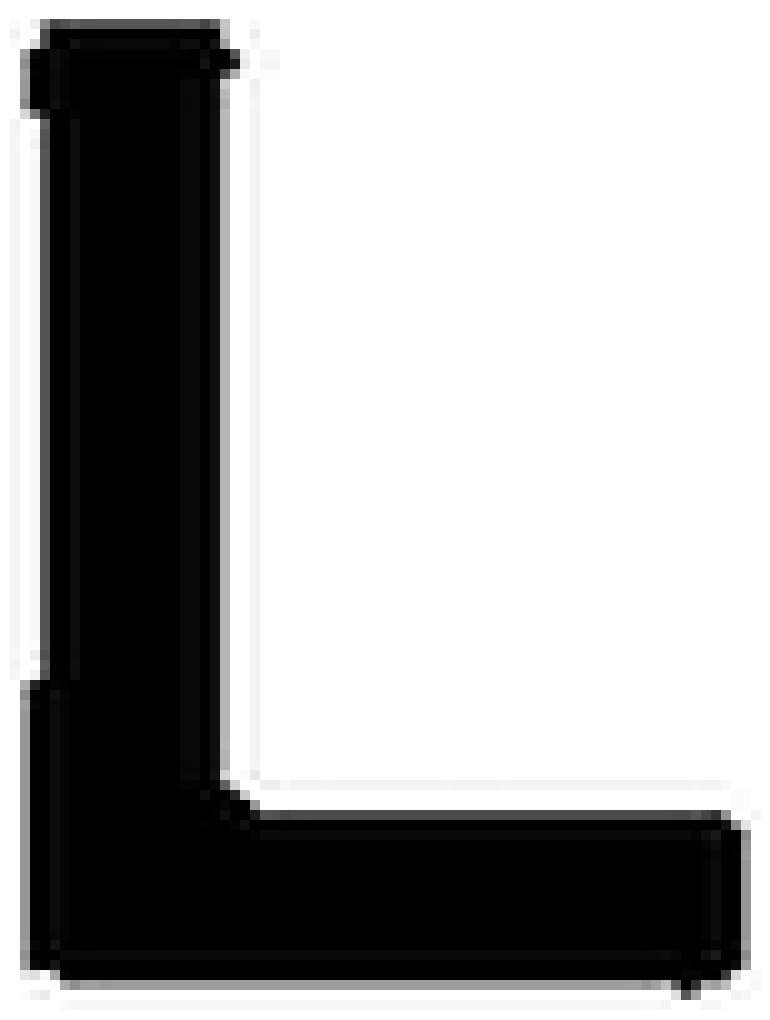

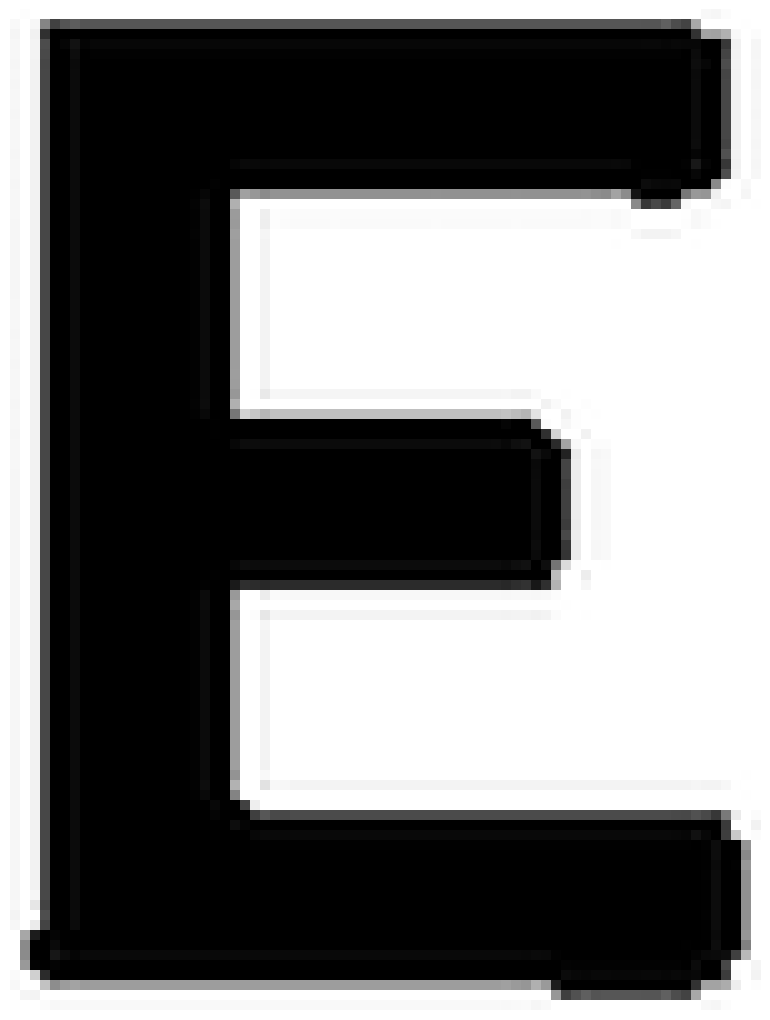

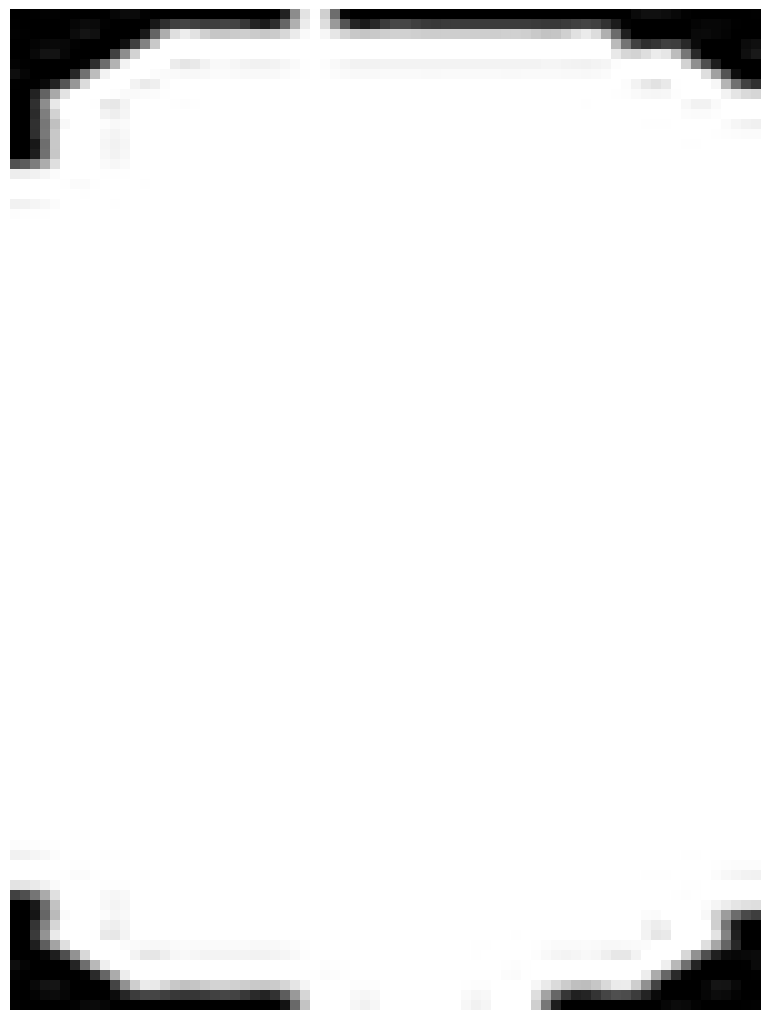

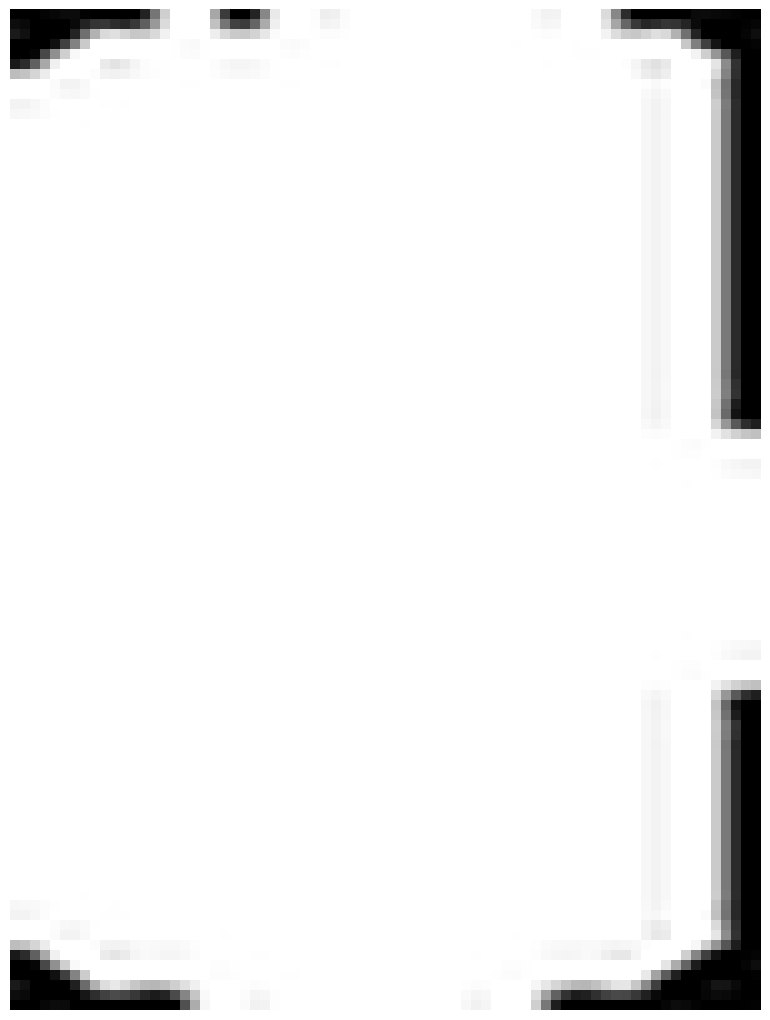

In [50]:
characters = []
for keys, values in direcciones_y.items(): 
    for i in values:
        character =  placaBinarized[i[1]:i[1]+i[3],i[0]:i[0]+i[2]]
        res = cv.resize(character, dsize=(75, 100), interpolation=cv.INTER_LANCZOS4)
        cvlib.imgview(res)
        res_flatten = res.flatten()
        characters.append(res_flatten)

In [51]:
loaded_model = pickle.load(open('modelo.sav', 'rb'))

In [52]:
result = loaded_model.predict(characters)

In [53]:
result

array(['G', '0', '0', 'G', 'L', 'E', 'T', 'T'], dtype='<U1')